**Основные цели этого задания**:
*   Научиться понижать размерность данных
*   Попрактиковаться в обучении моделей кластеризации

**Задача: по замерам акселерометра и гироскопа, произведенным с помощью телефона, находящегося на поясе, научиться отделять различные типы активностей друг от друга**

In [129]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

*1. Загрузите данные из источника по ссылке. Нам нужен файл X_train.txt (там будет чуть более 7 тысяч наблюдений). Чтобы подгрузить этот файл, можно воспользоваться функцией loadtxt библиотеки numpy.*

In [98]:
X_train = np.loadtxt('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.5X_train.txt')

In [99]:
print("shape of data:",X_train.shape)
print("datatype of data:",X_train.dtype)

shape of data: (7352, 561)
datatype of data: float64


*2. Ознакомьтесь с данными*:
*   выведите количество признаков;
*   есть ли в данных пропуски;
*   отличаются ли различные признаки по масштабу

Можно перевести данные в DataFrame для более "красивого" отображения:

In [100]:
df = pd.DataFrame(data=X_train)

In [145]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


*   Всего строк 7352, пустые значения отсутствуют. 
*   Колонок (Признаков) 561
*   Тип данных float64
*   Размер датасета 31.5 MB

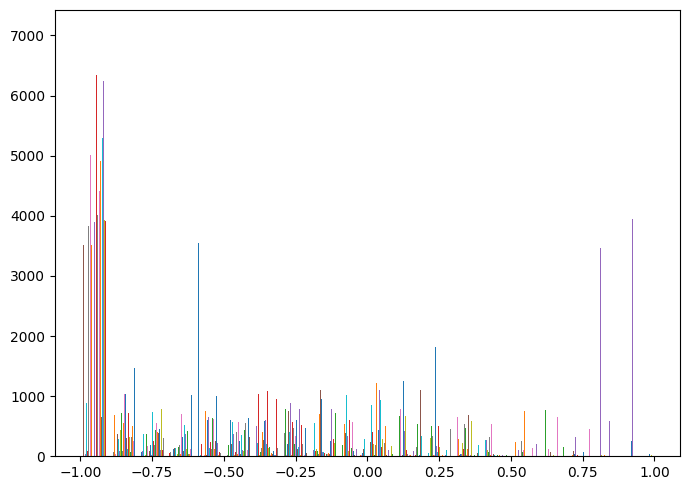

In [103]:
fig, axs = plt.subplots(1, 1,
                        figsize =(7, 5),
                        tight_layout = True)
 
axs.hist(df, bins = 20)

plt.show()

**Диаграмма не совсем "читаема", но мы видим, что все признаки по масштабу находятся в диапазоне от -1.0 до 1.0**

*3. Понизьте размерность данных*:
1.   воспользуйтесь методом порога отклонения, чтобы избавиться от наблюдений, вариативность по которым низка. Удалите не более 10 % признаков;
2.   воспользуйтесь методом PCA:
    *   приведите признаки к одинаковому масштабу,
    *   визуализируйте зависимость степени объяснения дисперсии исходных данных от количества выделяемых главных компонент,
    *   определите минимальное необходимое количество главных компонент, при которых объяснение дисперсии исходных данных будет достаточно велико (хотя бы 90 %),
    *   выделите первые две главные компоненты и с помощью визуализации убедитесь, что новые признаки позволяют неплохо отделить данные друг от друга.

In [44]:
var_selector=VarianceThreshold(threshold=0.01)
df_var = var_selector.fit_transform(df)

In [45]:
print("shape of data:",df_var.shape)
print(f'Удалено признаков: {561 - 524}, что составляет {round(100 - (524 / 561 * 100) , 2)}% от общей выборки')

shape of data: (7352, 524)
Удалено признаков: 37, что составляет 6.6% от общей выборки


*PCA - Метод главных компонент*

In [146]:
features_norm = StandardScaler().fit_transform(df)

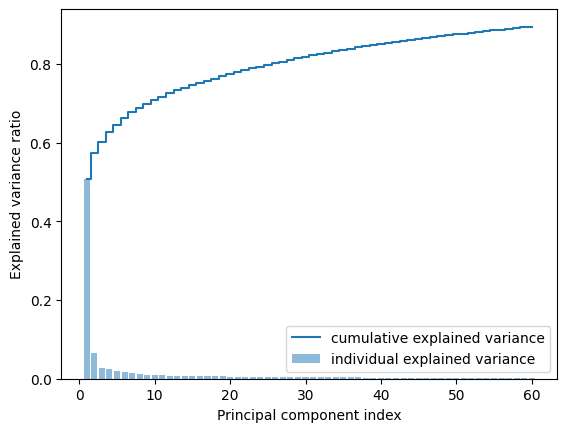

In [147]:
pca = PCA(n_components = 60)
pca.fit(features_norm)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 61), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1, 61), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [148]:
print(var_exp)
print(sum(var_exp))

[0.50781172 0.0658068  0.02806437 0.02503953 0.01888285 0.01724006
 0.01371011 0.01199078 0.00995859 0.00965087 0.00860051 0.00800281
 0.00763996 0.00645327 0.00632322 0.00599718 0.00586747 0.00575403
 0.00567914 0.00527283 0.00500353 0.00488401 0.00478195 0.0046856
 0.00449261 0.00420915 0.00417879 0.00405527 0.00388433 0.00386892
 0.00365851 0.00354367 0.0034776  0.00336912 0.00329571 0.00327928
 0.00320255 0.00295168 0.00285263 0.00284111 0.00268366 0.00264368
 0.00261772 0.00257383 0.0024812  0.00246256 0.00236859 0.00234821
 0.00228536 0.00226255 0.0021643  0.00206895 0.00205254 0.0019919
 0.00193259 0.00190112 0.00187829 0.00185215 0.00179331 0.00175173]
0.8943763777121366


**Минимальное необходимое количество главных компонент - 60. При этом объяснение дисперсии исходных данных будет 89.44 %**

In [149]:
pca = PCA(n_components = 2)
features_reduced = pca.fit_transform(features_norm)

pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.000028,-0.002473,-0.001527,0.056213,0.056788,0.054363,0.055969,0.056264,0.053886,0.055892,...,-0.005451,0.012324,0.010199,-0.001678,-0.001186,0.001014,-0.001582,-0.023100,0.029719,0.026622
1,0.015638,-0.000080,-0.004052,-0.011165,-0.025959,-0.031240,-0.009835,-0.028635,-0.035351,-0.010926,...,0.068717,-0.016957,-0.012832,-0.006337,-0.003623,0.012141,-0.008723,0.017476,-0.035213,-0.017278


In [150]:
pd.DataFrame(features_reduced).corr()

,0,1
0,1.000000e+00,-5.401834e-17
1,-5.401834e-17,1.000000e+00


**Видно, что первый главный компонент отвечает за дисперсию 52,29%. А пот второй главный компонент - 6,46% .**

*Построим график по 2м главным компонентам:*

C:\Users\1will\AppData\Local\Temp\ipykernel_12692\3724070101.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  s=20, cmap='viridis')


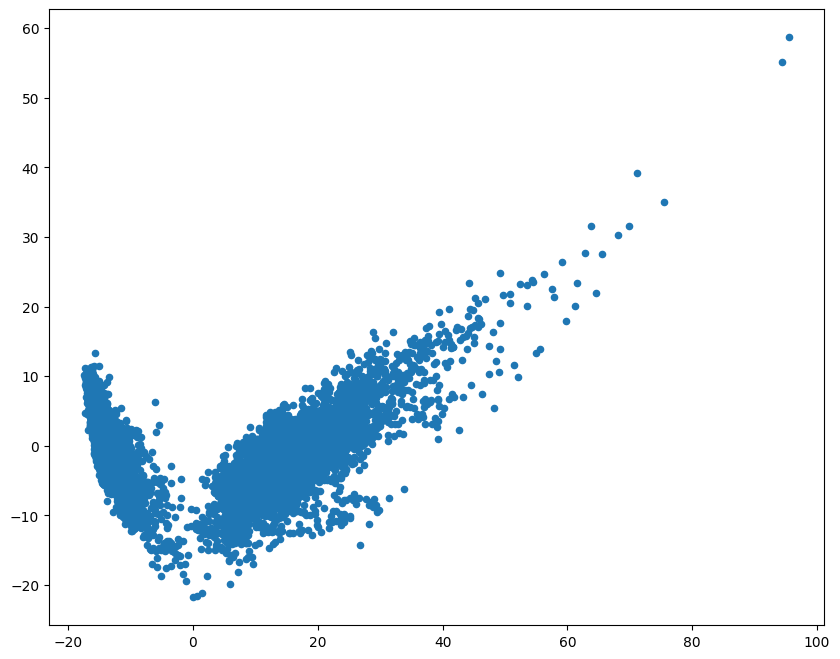

In [151]:
X_reduced = pca.fit_transform(features_reduced)

plt.figure(figsize=(10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],  s=20, cmap='viridis')

In [177]:
df_red = pd.DataFrame(data=X_reduced)

**На визуализации видно, что признаки можно неплохо "отделить" друг от друга на две части. Можно как будто провести вертикаль примерно на 0**

*4. Подберите оптимальное число кластеров*:
*   воспользуйтесь методом локтя, чтобы оценить, как варьируется значение целевой функции кластеризации в зависимости от количества кластеров, на которые мы делим данные;
*   выберите оптимальное количество кластеров и объясните свой выбор;
*   повторите визуализацию данных по первым двум главным компонентам, размечая наблюдения каждого кластера своим цветом.

In [182]:
distortion = []
K = range(1, 10)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4, n_init=10)
    model.fit(X_train)
    distortion.append(model.inertia_) 

100%|██████████| 9/9 [00:24<00:00,  2.78s/it]


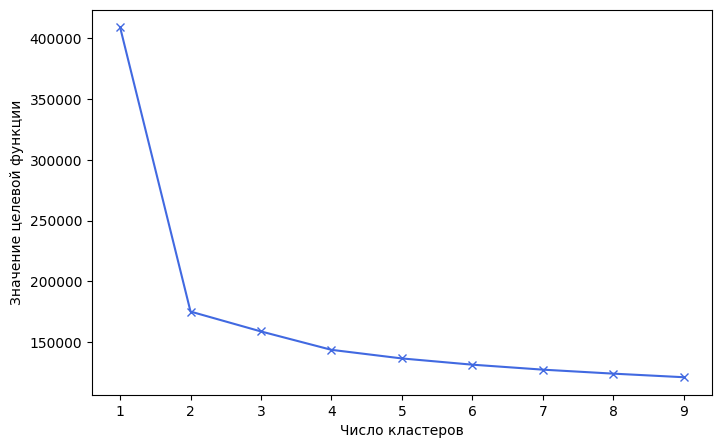

In [183]:
plt.figure(figsize=(8, 5))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

**Я буду делить на 2 кластера, так как после 2х наблюдается плавное снижение значения целевой функции.**

In [244]:
model_k = KMeans(n_clusters=2, random_state=12, n_init=10)
model_k.fit(df_red)

print("Центроиды кластеров:")
print(model_k.cluster_centers_)

Центроиды кластеров:
[[-13.97951941   1.02105355]
 [ 17.24084107  -1.25925802]]


<Axes: xlabel='0', ylabel='1'>

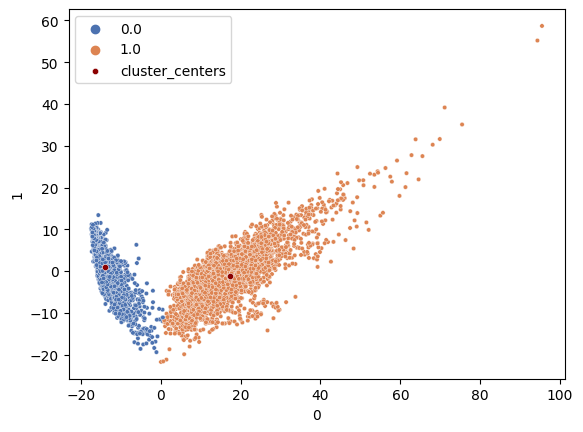

In [245]:
# разметка моделью
sns.scatterplot(
    data=pd.DataFrame(np.hstack([df_red, np.array([model_k.labels_]).T]), columns=['0', '1', 'label']), 
    x='0',
    y='1',
    hue='label', 
    palette='deep',
    s=10
)
sns.scatterplot(
    pd.DataFrame(model_k.cluster_centers_, columns=['f1', 'f2']), 
    color='darkred', 
    x='f1',
    y='f2',
    s=20,
    label='cluster_centers'
)

**Как и говорилось ранее, зрительно можно разделить данные на 2 класса**

*5. Оцените качество кластеризации*:
*   подгрузите реальные метки наблюдений из файла y_train.txt, а также их значения из файла activity_labels.txt;
*   определите, насколько логична полученная кластеризация. Можно, например, сформировать сводную таблицу, где в строках будут реальные активности, а в столбцах — лейблы, полученные согласно кластеризации;
*   сделайте выводы, опишите, почему те или иные виды активности могли объединиться в один кластер, а другие отделиться от них.

In [184]:
y_train = np.loadtxt('https://raw.githubusercontent.com/W1llAnn/1tdata-homework/main/2.5y_train.txt')
y_train

array([5., 5., 5., ..., 2., 2., 2.])

In [188]:
df_y_train = pd.DataFrame(data=y_train)

*Соберем все в 1 DataFrame:*

In [190]:
data_check = pd.DataFrame(np.hstack([df_red, df_y_train, np.array([model_k.labels_]).T]))
data_check

,0,1,2,3
0,-16.138544,2.152024,5.0,0.0
1,-15.296194,1.387144,5.0,0.0
2,-15.137019,2.473351,5.0,0.0
3,-15.350884,3.915681,5.0,0.0
4,-15.544814,4.598737,5.0,0.0
...,...,...,...,...
7347,15.465060,-12.536306,2.0,1.0
7348,14.222722,-10.253500,2.0,1.0
7349,14.333436,-12.260712,2.0,1.0
7350,12.876019,-14.071256,2.0,1.0


In [221]:
unique = data_check[2].unique()
unique

array([5., 4., 6., 1., 3., 2.])

Так как зрительно, смотря на DataFrame не оценить качество, нам нужно визуализировать данные, чтобы понять количество "ошибок"

<Axes: xlabel='0', ylabel='1'>

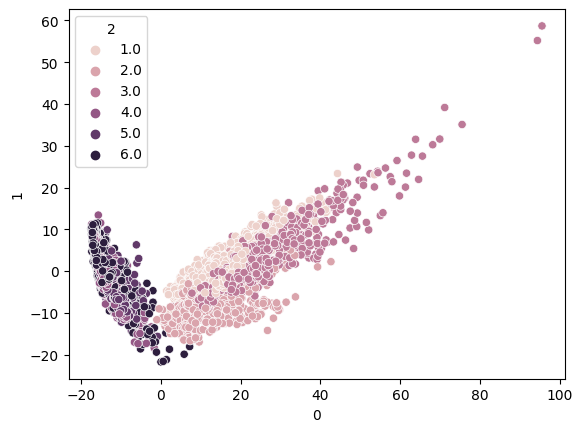

In [241]:
sns.scatterplot(data=data_check, x=data_check[0], y=data_check[1], hue=data_check[2])

**Как мы можем видеть, данные не имеют четкого разделения, как получилось у нашей модели.**

**ВЫВОДЫ**: 
Мы провели следующие действия над данными:
*   Краткий анализ данных
*   Понизили размерность данных методом порога отклоненияи методом PCA
*   Подобрали оптимальное количество кластеров и визуализировали данные

Теперь перейдем к оценке кластеризации. На графике логтя, как и зрительно на визуализации 2х главных компонент, мы видели, что данные можно разделить на 2 части. Но на самом деле они делятся на 6 частей и без четкой границы. На мой взгляд, это произошло потуму, что мы обучали модель только на 2х компонентах, хотя их нужно порядка 60 для нахождения зависимостей, но в этом случае мы не можем визуализировать данные, ровно как и найти и визуализировать центроиды (из-за многомерности пространства). 